# Genetic Algorithm

## Libraries


In [ ]:
import numpy as np
import random
import math
import numpy as np
from copy import deepcopy
from copy import copy
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import random
import matplotlib.pyplot as plt

%matplotlib inline

## Load Data

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/AI Class Project 1/qa194.tsp') as f:
    file = f.read().split("\n")
    coords = []
    for i in file:
        a , b, c = i.split()
        b = float(b)
        c = float(c)
        coords.append((b,c))
print(coords)

[(24748.3333, 50840.0), (24758.8889, 51211.9444), (24827.2222, 51394.7222), (24904.4444, 51175.0), (24996.1111, 51548.8889), (25010.0, 51039.4444), (25030.8333, 51275.2778), (25067.7778, 51077.5), (25100.0, 51516.6667), (25103.3333, 51521.6667), (25121.9444, 51218.3333), (25150.8333, 51537.7778), (25158.3333, 51163.6111), (25162.2222, 51220.8333), (25167.7778, 51606.9444), (25168.8889, 51086.3889), (25173.8889, 51269.4444), (25210.8333, 51394.1667), (25211.3889, 51619.1667), (25214.1667, 50807.2222), (25214.4444, 51378.8889), (25223.3333, 51451.6667), (25224.1667, 51174.4444), (25233.3333, 51333.3333), (25234.1667, 51203.0556), (25235.5556, 51330.0), (25235.5556, 51495.5556), (25242.7778, 51428.8889), (25243.0556, 51452.5), (25252.5, 51559.1667), (25253.8889, 51535.2778), (25253.8889, 51549.7222), (25256.9444, 51398.8889), (25263.6111, 51516.3889), (25265.8333, 51545.2778), (25266.6667, 50969.1667), (25266.6667, 51483.3333), (25270.5556, 51532.7778), (25270.8333, 51505.8333), (25270.83

<class 'float'>


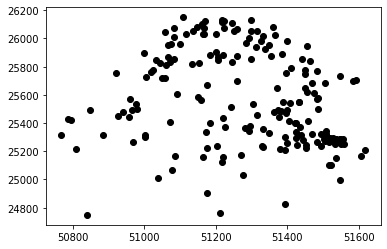

In [ ]:
print(type(coords[0][0]))

for i in range(len(coords)):
  plt.plot(coords[i][1], coords[i][0], 'o', color='black');

### distance

In [ ]:
def distance(coord1 , coord2):
  dis = np.sqrt(np.square(coord1[0]-coord2[0]) + np.square(coord1[1]-coord2[1]))
  return dis
distance(coords[0], coords[1])

290.99301545433866

### Make matrix of distance:

In [ ]:
def tsp_matrix(coords):
  tsp = []
  row = []
  for i in range(len(coords)):
    row.clear()
    for j in range(len(coords)):
      row.append(distance(coords[i] ,coords[j]))
    r = copy(row)
    tsp.append(r)
  return tsp

### Make population

In [ ]:
def make_population(tsp, num):
  """
  This function makes populations, input: tsp is list of roads , num is number of population we want
  """
  cities = list(range(len(tsp)))
  solution = []

  for i in range(len(tsp)):
    random_city = cities[random.randint(0,len(cities)-1)]
    solution.append(random_city)
    cities.remove(random_city)

  neighbors = []
  for i in range(len(solution)): #This for loop will make new list from solution by changing element positions
    for j in range(i+1,len(solution)):
      a = solution.copy()
      a[i] = solution[j]
      a[j] = solution[i]
      neighbors.append(a)

  return neighbors[:num]

In [ ]:
#Test
tsp = tsp_matrix(coords)
n = make_population(tsp, 5)
print(len(n),np.array(n))

5 [[ 0 15  2  8  7 36 14 27 23 28 35 21 33 10 20  5 30  6 18 22 29  4 17  1
  34  3 13 31 32 12 37 16  9 19 25 24 11 26]
 [ 2  0 15  8  7 36 14 27 23 28 35 21 33 10 20  5 30  6 18 22 29  4 17  1
  34  3 13 31 32 12 37 16  9 19 25 24 11 26]
 [ 8  0  2 15  7 36 14 27 23 28 35 21 33 10 20  5 30  6 18 22 29  4 17  1
  34  3 13 31 32 12 37 16  9 19 25 24 11 26]
 [ 7  0  2  8 15 36 14 27 23 28 35 21 33 10 20  5 30  6 18 22 29  4 17  1
  34  3 13 31 32 12 37 16  9 19 25 24 11 26]
 [36  0  2  8  7 15 14 27 23 28 35 21 33 10 20  5 30  6 18 22 29  4 17  1
  34  3 13 31 32 12 37 16  9 19 25 24 11 26]]


### Cost Function - Route lenght

In [ ]:
def cost(tsp, solution):
  """
  Funciton input is tsp and solution which tsp is matrix of distance between cites and solution is list of cites

  The output is length of solution from firt city to the goal (cost)
  """
  length = 0.0
  for q in range(len(solution)):
    length += tsp[solution[q-1]][solution[q]]
  return length
  

In [ ]:
#test
n = make_population(tsp, 5)
tsp = tsp_matrix(coords)
for i in n:
  print(f"solution : {i} whit cost of = {cost(tsp, i)}")

solution : [33, 36, 34, 18, 30, 2, 12, 20, 37, 24, 27, 28, 25, 19, 26, 22, 7, 9, 10, 35, 6, 29, 16, 17, 13, 15, 21, 3, 0, 31, 4, 32, 23, 11, 14, 5, 8, 1] whit cost of = 28300.24519308566
solution : [34, 33, 36, 18, 30, 2, 12, 20, 37, 24, 27, 28, 25, 19, 26, 22, 7, 9, 10, 35, 6, 29, 16, 17, 13, 15, 21, 3, 0, 31, 4, 32, 23, 11, 14, 5, 8, 1] whit cost of = 28371.270411273377
solution : [18, 33, 34, 36, 30, 2, 12, 20, 37, 24, 27, 28, 25, 19, 26, 22, 7, 9, 10, 35, 6, 29, 16, 17, 13, 15, 21, 3, 0, 31, 4, 32, 23, 11, 14, 5, 8, 1] whit cost of = 27539.073606214424
solution : [30, 33, 34, 18, 36, 2, 12, 20, 37, 24, 27, 28, 25, 19, 26, 22, 7, 9, 10, 35, 6, 29, 16, 17, 13, 15, 21, 3, 0, 31, 4, 32, 23, 11, 14, 5, 8, 1] whit cost of = 28694.56215975354
solution : [2, 33, 34, 18, 30, 36, 12, 20, 37, 24, 27, 28, 25, 19, 26, 22, 7, 9, 10, 35, 6, 29, 16, 17, 13, 15, 21, 3, 0, 31, 4, 32, 23, 11, 14, 5, 8, 1] whit cost of = 28353.540699448848


### top_costs

In [ ]:
def top_costs(tsp,population,n):
  """
  inputs : 
  tsp:,atrix of distance
  population :list of splutions = [[road1],[road2],....]
  n : is a intiger number and we use that to show n top costs

  output: 

  population_and_cost[:n] : is a list of list of roads(solution) and thire cost 
                            which have been sorted by thir costs

  exp: population_and_cost[:n] = [[[solution0],solution0_cost],[[solution1],solution1_cost] , ... ]

  """
  population_and_cost = []
  for i in population:
    population_and_cost.append([i,cost(tsp,i)])
  population_and_cost.sort(key=lambda x: x[1]) # This line of cods sorts population_and_cost by cost element

  return population_and_cost[:n]

In [ ]:
#test funciton above
population = make_population(tsp, 5)
tsp = tsp_matrix(coords)
for i in population:
  print(f"solution : {i} whit cost of = {cost(tsp, i)}")

tops = top_costs(tsp,population,2)

for i in tops:
  print(f"best costs : {i}")


solution : [3, 18, 34, 33, 1, 11, 17, 8, 4, 0, 36, 12, 6, 9, 22, 13, 14, 29, 20, 10, 31, 26, 7, 24, 32, 5, 27, 28, 15, 2, 37, 16, 35, 25, 23, 30, 21, 19] whit cost of = 29200.997946835858
solution : [34, 3, 18, 33, 1, 11, 17, 8, 4, 0, 36, 12, 6, 9, 22, 13, 14, 29, 20, 10, 31, 26, 7, 24, 32, 5, 27, 28, 15, 2, 37, 16, 35, 25, 23, 30, 21, 19] whit cost of = 29963.15848160602
solution : [33, 3, 34, 18, 1, 11, 17, 8, 4, 0, 36, 12, 6, 9, 22, 13, 14, 29, 20, 10, 31, 26, 7, 24, 32, 5, 27, 28, 15, 2, 37, 16, 35, 25, 23, 30, 21, 19] whit cost of = 30341.439216688304
solution : [1, 3, 34, 33, 18, 11, 17, 8, 4, 0, 36, 12, 6, 9, 22, 13, 14, 29, 20, 10, 31, 26, 7, 24, 32, 5, 27, 28, 15, 2, 37, 16, 35, 25, 23, 30, 21, 19] whit cost of = 27865.048976261765
solution : [11, 3, 34, 33, 1, 18, 17, 8, 4, 0, 36, 12, 6, 9, 22, 13, 14, 29, 20, 10, 31, 26, 7, 24, 32, 5, 27, 28, 15, 2, 37, 16, 35, 25, 23, 30, 21, 19] whit cost of = 29400.752947333676
best costs : [[1, 3, 34, 33, 18, 11, 17, 8, 4, 0, 36, 12, 6, 

### cross_over

In [ ]:
def cross_over(tsp,top_population, prob=1):
  """
  inputs:
  tsp: matrix of distance
  top_population: list of list of roads and thire costs: [[[road0],cost0],[[road1],cost1],....]

  output:
  new_genration: list of list of roads and thire costs: [[[road0],cost0],[[road1],cost1],....]

  This function makes new road(genration) by swape n elemet of each list
  """
  road_paths = []
  for i in top_population:# In this line of code we collectiong road_paths from top_population
    road_paths.append(i[0])
  
  new_genration = []

  for i in range(1,len(road_paths)):
    if random.random() < prob:  
      p1,p2 = deepcopy(road_paths[i-1]),deepcopy(road_paths[i])
      point = random.randint(1,len(p1)-2)
      
      for j in range(point,len(p1)):
          p1[j],p2[j] = p2[j],p1[j]
      new_genration.append([p1,cost(tsp,p1)])
      new_genration.append([p2,cost(tsp,p2)])
    else:
      new_genration.append(top_population[i-1])

  return new_genration  
    

In [ ]:
#test funciton above
population = make_population(tsp, 100000)
tsp = tsp_matrix(coords)

tops = top_costs(tsp,population,5)

for i in tops:
  print(f"best costs : {i}")

new_genration = cross_over(tsp,tops,1)

for j in new_genration:
  print(f"new_genration : {j}")


best costs : [[25, 23, 15, 9, 4, 5, 8, 16, 24, 17, 19, 0, 2, 7, 21, 3, 14, 37, 31, 29, 12, 10, 1, 22, 11, 30, 33, 36, 27, 6, 32, 18, 13, 26, 35, 34, 20, 28], 23086.608689933015]
best costs : [[25, 23, 15, 9, 4, 5, 33, 16, 24, 17, 19, 0, 2, 7, 21, 3, 14, 37, 31, 29, 12, 10, 1, 22, 11, 30, 32, 36, 27, 6, 8, 18, 13, 26, 35, 34, 20, 28], 23109.13436051277]
best costs : [[25, 23, 15, 9, 4, 5, 6, 16, 24, 17, 19, 0, 2, 7, 21, 3, 14, 37, 31, 29, 12, 10, 1, 22, 11, 30, 8, 36, 27, 33, 32, 18, 13, 26, 35, 34, 20, 28], 23273.291773312973]
best costs : [[25, 23, 15, 9, 4, 5, 33, 16, 24, 17, 19, 0, 2, 7, 21, 3, 14, 37, 31, 29, 12, 10, 1, 22, 11, 6, 8, 36, 27, 30, 32, 18, 13, 26, 35, 34, 20, 28], 23646.18110632865]
best costs : [[25, 23, 13, 9, 4, 5, 33, 16, 24, 17, 19, 0, 2, 7, 21, 3, 14, 37, 31, 29, 12, 10, 1, 22, 11, 30, 8, 36, 27, 6, 32, 18, 15, 26, 35, 34, 20, 28], 23661.46943509889]
new_genration : [[25, 23, 15, 9, 4, 5, 33, 16, 24, 17, 19, 0, 2, 7, 21, 3, 14, 37, 31, 29, 12, 10, 1, 22, 11, 30,

### Mutation

In [ ]:
def mutation(tsp:"Matrix of distance",cross_over:"The cross overed popultaion" 
             , prob:"probiliy to change a element" = 0.05) -> "[[[road0],cost0],[[road1],cost1],....]":
  """
  inputs:
  tsp: matrix of distance
  top_population: list of list of roads and thire costs: [[[road0],cost0],[[road1],cost1],....]

  output:
  new_genration: list of list of roads and thire costs: [[[road0],cost0],[[road1],cost1],....]

  This function makes new road(genration) by swape n elemet of each list
  """
  road_paths = []
  for i in cross_over:# In this line of code we collectiong road_paths from top_population
    road_paths.append(i[0])

  road_paths_copy = deepcopy(road_paths)

  for j in road_paths:
    for k in range(len(j)):
      if random.random() < prob:
        j[k] = (len(j)-1) - j[k]
  

  new_genration = road_paths

  new_genration_with_cost = []

  for m in new_genration:
    new_genration_with_cost.append([m,cost(tsp,m)])
    
  return new_genration_with_cost

In [ ]:
#test funciton above
population = make_population(tsp, 100000)
tsp = tsp_matrix(coords)

tops = top_costs(tsp,population,5)

#for i in tops:
  #print(f"best costs : {i}")

cross_over_population = cross_over(tsp,tops,1)

#for j in cross_over_population:
 #print(f"cross over : {j}")

new_genration = mutation(tsp, cross_over_population, 0.1)

print(len(new_genration))
for k in new_genration:
  print(f"new_genration: {k}")

8
new_genration: [[8, 21, 28, 11, 10, 19, 26, 30, 14, 9, 3, 25, 18, 6, 13, 5, 0, 2, 31, 3, 17, 15, 36, 27, 16, 12, 29, 4, 1, 23, 30, 5, 33, 35, 15, 20, 0, 24], 26998.872746106324]
new_genration: [[8, 21, 28, 11, 10, 19, 26, 30, 14, 9, 34, 25, 18, 6, 13, 5, 0, 2, 4, 34, 17, 22, 36, 27, 16, 33, 29, 31, 1, 23, 7, 32, 12, 35, 15, 20, 37, 24], 27647.793127944387]
new_genration: [[8, 21, 28, 11, 27, 19, 26, 12, 14, 9, 34, 25, 18, 6, 13, 5, 0, 2, 31, 3, 17, 15, 36, 27, 16, 33, 29, 4, 1, 23, 7, 32, 30, 35, 15, 20, 37, 24], 26581.703521892887]
new_genration: [[8, 21, 28, 11, 10, 19, 26, 30, 14, 28, 34, 25, 18, 6, 13, 5, 37, 2, 6, 3, 20, 22, 1, 27, 16, 12, 29, 4, 1, 23, 7, 32, 33, 35, 15, 17, 0, 24], 25335.275079065977]
new_genration: [[8, 21, 28, 11, 10, 19, 26, 12, 14, 9, 34, 25, 19, 6, 13, 32, 0, 2, 31, 34, 17, 22, 36, 27, 21, 33, 8, 4, 1, 23, 7, 16, 12, 35, 15, 20, 37, 24], 26684.540919378545]
new_genration: [[8, 21, 28, 26, 10, 19, 26, 30, 23, 9, 34, 12, 18, 6, 13, 5, 0, 2, 31, 3, 17, 22, 3

### Genetic

In [ ]:
def genetic(tsp, ittiration):
  cost_value = []

  population = make_population(tsp, 1000)# making a random population
  top_population = top_costs(tsp,population, 200) # This line of code chooses top 5 lowest cost soultions fromat = [[[solutin0],cost0],[[solutin1],cost1],...]
  
  for i in range(ittiration):
    print(f"ittiration : {i}")
    cross_over_population = cross_over(tsp,top_population,0.085)
    new_genration = mutation(tsp,cross_over_population,0.001)

    new_genration.sort(key=lambda x: x[1])
    cost_value.append(new_genration[0][1])

    top_population =  new_genration
  
  best_cost = new_genration[0][1]

  return best_cost,cost_value 


ittiration : 0
ittiration : 1
ittiration : 2
ittiration : 3
ittiration : 4
ittiration : 5
ittiration : 6
ittiration : 7
ittiration : 8
ittiration : 9
ittiration : 10
ittiration : 11
ittiration : 12
ittiration : 13
ittiration : 14
ittiration : 15
ittiration : 16
ittiration : 17
ittiration : 18
ittiration : 19
ittiration : 20
ittiration : 21
ittiration : 22
ittiration : 23
ittiration : 24
ittiration : 25
ittiration : 26
ittiration : 27
ittiration : 28
ittiration : 29
ittiration : 30
ittiration : 31
ittiration : 32
ittiration : 33
ittiration : 34
ittiration : 35
ittiration : 36
ittiration : 37
ittiration : 38
ittiration : 39
ittiration : 40
ittiration : 41
ittiration : 42
ittiration : 43
ittiration : 44
ittiration : 45
ittiration : 46
ittiration : 47
ittiration : 48
ittiration : 49
ittiration : 50
ittiration : 51
ittiration : 52
ittiration : 53
ittiration : 54
ittiration : 55
ittiration : 56
ittiration : 57
ittiration : 58
ittiration : 59
ittiration : 60
ittiration : 61
ittiration : 62
it

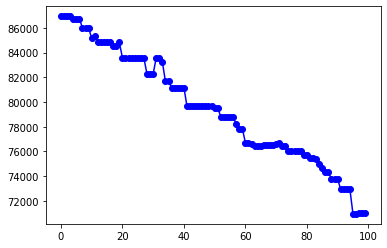

In [ ]:
iteration = 100

tsp = tsp_matrix(coords)

best_cost,cost_value = genetic(tsp, iteration)

print(best_cost)

r = []
for i  in range(iteration):
  r.append(i)

plt.plot(r, cost_value, '-o', color='blue');


